# Linear Algebra with SciPy
The main Python package for linear algebra is the SciPy subpackage `scipy.linalg` which builds on NumPy. Let's import both packages:

In [1]:
import numpy as np
import scipy.linalg as la

## NumPy Arrays
### Array Attributes
Create a 1D (one-dimensional) NumPy array and verify its dimensions, shape and size.

In [2]:
a = np.array([1, 3, -2, 1])
print(a)

[ 1  3 -2  1]


Verify the number of dimensions:

In [3]:
a.ndim

1

Verify the shape of the array:

In [4]:
a.shape

(4,)

The shape of an array is returned as a Python tuple. The output in the cell above is a tuple of length 1. And we verify the size of the array(i.e. the total number of entries in the array):

In [5]:
a.size

4

Create a 2D(two-dimensional) NumPy array(i.e. matrix):

In [6]:
M = np.array([[1, 2], [3, 7], [-1, 5]])
print(M)

[[ 1  2]
 [ 3  7]
 [-1  5]]


Verify the number of dimensions:

In [7]:
M.ndim

2

Verify the shape of the array:

In [8]:
M.size

6

Select a row or column from a 2D NumPy array and we get a 1D array:

In [9]:
col = M[:, 1]
print(col)

[2 7 5]


Verify the number of dimensions of the slice:

In [10]:
col.ndim

1

Verify the shape and size of the slice:

In [11]:
col.shape

(3,)

In [12]:
col.size

3

When we select a row of column from a 2D NumPy array, the result is a 1D NumPy array. However, we may want to select a column as a 2D column vector. 
This requires us to use the reshape method.
\\
For example, create a 2D column vector from the 1D slice selected from the matrix `M` above:

In [13]:
print(col)

[2 7 5]


In [14]:
column = np.array([2, 7, 5]).reshape(3, 1)
print(column)

[[2]
 [7]
 [5]]


Verify the dimensions, shape and size of the array:

In [15]:
print('Dimensions:', column.ndim)
print("Shape:", column.shape)
print("Size:", column.size)

Dimensions: 2
Shape: (3, 1)
Size: 3


The variables `col` and `column` are different types of objects even though they have the "same" data.

In [16]:
print(col)

[2 7 5]


In [17]:
print('Dimensions:', col.ndim)
print("Shape:", col.shape)
print("Size:", col.size)

Dimensions: 1
Shape: (3,)
Size: 3


## Matrix Operations and Functions
### Arithmetic Operations
Recall that arithmetic array operations `+`,`-`,`/`,`*` and `**` are performed elementwise on NumPy arrays. Let's create a NumPy array and do some computations:

In [18]:
M = np.array([[3, 4], [-1, 5]])
print(M)

[[ 3  4]
 [-1  5]]


In [19]:
M * M

array([[ 9, 16],
       [ 1, 25]])

### Matrix Multiplication
We use the `@` operator to do matrix multiplication with NumPy arrays:

In [20]:
M @ M

array([[ 5, 32],
       [-8, 21]])

Let's compute $2I+3A-AB$ for 
$$ A = \begin{bmatrix} 1 & 3\\ -1 & 7 \end{bmatrix}, B=\begin{bmatrix} 5 & 2\\ 1& 2\end{bmatrix}$$ 
and $I$ is the identity matrix of size 2:

In [21]:
A = np.array([[1, 3], [-1, 7]])
print(A)

[[ 1  3]
 [-1  7]]


In [22]:
B = np.array([[5, 2], [1, 2]])
print(B)

[[5 2]
 [1 2]]


In [23]:
I = np.eye(2)
print(I)

[[1. 0.]
 [0. 1.]]


In [24]:
2*I + 3*A - A@B

array([[-3.,  1.],
       [-5., 11.]])

#### Matrix Powers
There's no symbol for matrix powers and so we must import the function `matrix_power` from the subpackage `numpy.linalg`.

In [25]:
from numpy.linalg import matrix_power as mpow

In [26]:
M = np.array([[3, 4], [-1, 5]])
print(M)

[[ 3  4]
 [-1  5]]


In [27]:
mpow(M, 2)

array([[ 5, 32],
       [-8, 21]])

In [28]:
mpow(M,5)

array([[-1525,  3236],
       [ -809,    93]])

Compare with the matrix multiplicatoin operator:

In [29]:
M @ M @ M @ M @ M

array([[-1525,  3236],
       [ -809,    93]])

In [30]:
mpow(M, 3)

array([[-17, 180],
       [-45,  73]])

In [31]:
M @ M @ M

array([[-17, 180],
       [-45,  73]])

#### Transpose
We can take the transpose with `.T` attribute:

In [32]:
print(M)

[[ 3  4]
 [-1  5]]


In [33]:
print(M.T)

[[ 3 -1]
 [ 4  5]]


Notice that $MM^{T}$ is a symmetric matrix:

In [34]:
M @ M.T

array([[25, 17],
       [17, 26]])

#### Inverse
We can find the inverse using the funciton `scipy.linalg.inv`:

In [35]:
A = np.array([[1, 2], [3, 4]])
print(A)

[[1 2]
 [3 4]]


In [36]:
la.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

#### Trace
We can find the trace of a matrix using the function `numpy.trace`:

In [37]:
np.trace(A)

5

In [38]:
la.det(A)

-2.0

### Examples
#### Characteristic Polynomials and Cayley-Hamiltion Theoren
The characteristic polynomial of 2 by 2 square matrix $A$ is
$$p_{A}(\lambda) = \text{det}(A-\lambda I)=\lambda^{2} - \text{tr}(A)\lambda + \text{det}(A)$$
The Cayley-Hamiltion Theorem states that any square matrix satisfies its characteristic polynomial. For a matrix $A$ of size 2, this means that
$$p_{A}(A) = A^{2} - \text{tr}(A)A + \text{det}(A) I = 0$$
Let's verify the Cayle-Hamilton Theorem for a few diffrerent matrices.

In [39]:
print(A)

[[1 2]
 [3 4]]


In [40]:
trace_A = np.trace(A)
det_A = la.det(A)
I = np.eye(2)
A @ A - trace_A * A + det_A * I

array([[0., 0.],
       [0., 0.]])

Let's do this again for some random matrices:

In [41]:
N = np.random.randint(0, 10, [2, 2])
print(N)

[[6 2]
 [1 0]]


In [42]:
trace_N = np.trace(N)
det_N = la.det(N)
I = np.eye(2)
N @ N - trace_N * N + det_N * I

array([[0., 0.],
       [0., 0.]])

### Projections
The formula to project a vector $v$ onto a vector $w$ is
$$\text{proj}_{w}(v) = \frac{v \cdot w}{w \cdot w}w$$
Let's write a function called `proj` which computes the projection $v$ onto $w$.

In [43]:
def proj(v, w):
    '''Project vector v onto w.'''
    v = np.array(v)
    w = np.array(w)
    return np.sum(v*w)/np.sum(w*w) * w

In [44]:
proj([1, 2, 3], [1, 1, 1])

array([2., 2., 2.])

## Eigenvalues and Eigenvectors

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

### Definition
Let $A$ be a square matrix. A non-zero vector $v$ is an eigenvector for $A$ with eigenvalue $\lambda$ if $$Av = \lambda v$$
Rearranging the equation, we see that $v$ is a solution of the homogeneous system of equations
$$(A-\lambda I) v = 0$$
where $I$ is the identity matrix of size $n$. Non-trivial solutions exies only if the matrix $A-\lambda I$ is singular which means $\text{det}(A-\lambda I) = 0 $. Therefore eigenvalues of $A$ are roos of the characteristic polynomial
$$p(\lambda) = \text{det}(A-\lambda I)$$

### scipy.linalg.eig
The funciton `scipy.linalg.eig` computes eigenvalues and eigenvectors of a square matrix $A$.
Let's consider a simple example with a diagonal matrix:

In [46]:
A = np.array([[1, 0], [0, -2]])
print(A)

[[ 1  0]
 [ 0 -2]]


The function `la.eig` returns a tuple `(eigvals, eigvecs)` where `eigvals` is a 1D NumPy array of complex numbers giving the eigenvalues of $A$, and `eigvecs` is a 2D NumPy array with the corresponding eigenvectors in the columns:

In [47]:
results = la.eig(A)

The eigenvalues of $A$ are:

In [48]:
print(results[0])

[ 1.+0.j -2.+0.j]


The corresponding eigenvectors are:

In [49]:
print(results[1])

[[1. 0.]
 [0. 1.]]


We can unpact the tuple:

In [50]:
eigvals, eigvecs = la.eig(A)
print(eigvals)

[ 1.+0.j -2.+0.j]


In [51]:
print(eigvecs)

[[1. 0.]
 [0. 1.]]


If we know that the eigenvalues are real numbers(i.e. if $A$ is symmetric), then we can use the NumPy array method `.real` to convert the array of eigenvalues to real numbers:

In [52]:
eigvals = eigvals.real
print(eigvals)

[ 1. -2.]


Notice that the position of an eigenvalue in the array `eigvals` correspond to the column in `eigvecs` with its eigenvector:

In [53]:
lambda1 = eigvals[1]
print(lambda1)

-2.0


In [54]:
v1 = eigvecs[:, 1].reshape(2,1)
print(v1)

[[0.]
 [1.]]


In [55]:
A @ v1

array([[ 0.],
       [-2.]])

In [56]:
lambda1 * v1

array([[-0.],
       [-2.]])

#### Examples
##### Symmetric Matrices
The eigenvalues of a symmetric matrix are always real and the eigenvectors are always orthogonal! Let's verify these facts with some random matrices:

In [57]:
n = 4
P = np.random.randint(0, 10, (n,n))
print(P)

[[0 4 7 0]
 [0 9 4 8]
 [0 6 9 0]
 [9 3 8 2]]


Create the symmetric matrix $S=PP^{T}$:

In [58]:
S = P @ P.T
print(S)

[[ 65  64  87  68]
 [ 64 161  90  75]
 [ 87  90 117  90]
 [ 68  75  90 158]]


Let's unpack the eigenvalues and eigenvectors of $S$:

In [59]:
evals, evecs = la.eig(S)
print(evals)

[3.68168465e+02+0.j 1.24665319e-01+0.j 4.80039247e+01+0.j
 8.47029447e+01+0.j]


The eigenvalues all have zero imaginary part and so they are indeed real numbers:

In [60]:
evals = evals.real
print(evals)

[3.68168465e+02 1.24665319e-01 4.80039247e+01 8.47029447e+01]


The corresponding eigenvectors of $A$ are:

In [61]:
print(evecs)

[[ 0.38409207  0.79590593 -0.4652622   0.05037974]
 [ 0.53974535  0.02669574  0.41179613 -0.73374807]
 [ 0.51974686 -0.60473587 -0.60305826  0.02187402]
 [ 0.53945476 -0.01075251  0.50027569  0.67719803]]


Let's check that the eigenvectors are orthogonal to each other:

In [62]:
v1 = evecs[:,0] # First column is the first eigenvector
print(v1)

[0.38409207 0.53974535 0.51974686 0.53945476]


In [63]:
v2 = evecs[:, 1]
print(v2)

[ 0.79590593  0.02669574 -0.60473587 -0.01075251]


In [64]:
v1 @ v2

-2.220446049250313e-16

The dot product of eigenvectors $v_{1} and v_{2}$ is zero(the numver above is very close to zero and is due to rounding errors in the computations) and so they are orthogonal!

#### Diagonalization
A square matrix $M$ is diagonalizable if ti is similar to a diagonal mattrix. In other words, $M$ is diagonalizable if there exists an invertible matrix $P$ such that $D = P^{-1}MP$ is a diagonal matrix.

A beautiful result in linear algebra is that a square matrix $M$ of size $n$ is diagonalizable if and only if $M$ has $n$ independent eigenvectors. Furthermore, $M=PDP^{-1}$ where the oclumns of $P$ are the eigenvectors of $M$ and $D$ has corresponding eigenvalues along the diagonal.

Let's use this to construct a matrix with given eigenvalues $\lambda_{1}=3, \lambda_{2}=1$, and eigenvectors $v_{1} = \left[1,1\right]^{T}, v_{2} = \left[1, -1 \right]^{T}$.

In [65]:
P = np.array([[1, 1], [1, -1]])
print(P)

[[ 1  1]
 [ 1 -1]]


In [66]:
D = np.diag((3, 1))
print(D)

[[3 0]
 [0 1]]


In [67]:
M = P @ D @ la.inv(P)
print(M)

[[2. 1.]
 [1. 2.]]


Let's verify that the eigenvalues of $M$ are 3 and 1:

In [68]:
evals, evecs = la.eig(M)
print(evals)

[3.+0.j 1.+0.j]


Verify the eigenvectors:

In [69]:
print(evecs)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


##### Matrix Powers
Let $M$ be a square matrix. Computing powers of $M$ by matrix multiplication $$M^{k}=\underbrace{MM \cdots M}_{k}$$
is computationally expensive. Instead, let's use diagonalization to compute $M^{k}$ more efficiently
$$M^{k} =(PDP^{-1})^{k} = \underbrace{PDP^{-1}PDP^{-1} \cdots PDP^{-1}}_{k} = PD^{k}P^{-1}$$
Let's compute $M^{20}$ both ways and compare execution time.

In [70]:
Pinv = la.inv(P)

In [71]:
k = 20

In [72]:
%%timeit
result = M.copy()
for _ in range(1, k):
    result = result @ M

41.8 µs ± 1.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Let's use diagonalization to do the same computation.

In [73]:
%%timeit
P @ D**k @ Pinv

6.04 µs ± 315 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Diagonalization computes $M^{k}$ much faster!

## Applications

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

### Polynomial Interpolation
Polynomial interpolation finds the unique polynomial of degree $n$ which passes through $n+1$ points in the $xy$-plane. For example, two points in the $xy$-plane determine a lines and three points determine a parabola.

#### Formulation
Suppose we have $n+1$ points in the $xy$-plane $$(x_{0},y_{0}), (x_{1}, y_{1}), \dots, (x_{n},y_{n})$$ such that all the $x$ values are distinct
$(x_{i} \neq x_{j} \text{for} i\neq j)$. The general form of a degree $n$ polynomial is $$p(x)=a_{0} + a_{1}x+a_{2}x^{2} + \dots + a_{n}x^{n}$$
If $p(x)$ is the unique degree $n$ polynomial which interpolates all the points, then the coefficeints $a_{0}, a_{1}, \dots, a_{n}$ satisfy the following equations:
$$\begin{align*}
a_{0} + a_{1}x_{0} + a_{2}x_{0}^{2} + \dots + a_{n}x_{0}^{n} &= y_{0}\\
a_{0} + a_{1}x_{1} + a_{2}x_{1}^{2} + \dots + a_{n}x_{1}^{n} &= y_{1}\\
&\vdots\\
a_{0} + a_{1}x_{n} + a_{2}x_{n}^{2} + \dots + a_{n}x_{n}^{n} &= y_{n}
\end{align*}$$
Therefore the vector of coefficents
$$ a = \begin{bmatrix} a_{0} \\ a_{1} \\ \vdots \\ a_{n} \end{bmatrix}$$
is the unique the solution of the linear system of equations $$Xa=y$$
where $X$ is the Vandermonde matrix and $y$ is the vector of $y$ values 
$$ X =
\begin{bmatrix}
1 & x_{0} & x_{0}^{2} & \dots &x_{0}^{n}\\
1 & x_{1} & x_{1}^{2} & \dots &x_{1}^{n}\\
  & \vdots &           &       &\vdots \\
1 & x_{n} & x_{n}^{2} & \dots &x_{n}^{n}
\end{bmatrix}
\quad \text{and} \quad y = \begin{bmatrix}
y_{0} \\
y_{1} \\
y_{2} \\
\vdots \\
y_{n} \end{bmatrix}$$

##### Examples
##### Simple Parabola
Let's do a simple example. We know that $y=x^{2}$ is the unique degree 2 polynomial that interpolates the points $(-1, 1), (0, 0) and (1, 1)$. Let's compute the polynomial interpolation of these points and verify the expected result $a_{0} = 0, a_{1} = 0$ and $a_{2} =1 $. 

Create the Vandermonde matrix $X$ with the array of $x$ values:

In [75]:
x = np.array([-1, 0, 1])
X = np.column_stack([[1, 1, 1], x, x**2])
print(X)

[[ 1 -1  1]
 [ 1  0  0]
 [ 1  1  1]]


Create the vector $y$ of $y$ values:

In [76]:
y = np.array([1, 0, 1]).reshape(3, 1)
print(y)

[[1]
 [0]
 [1]]


We expect the solution $\mathbf{a} = \left[ 0 , 0, 1 \right]^{T}$

In [77]:
a = la.solve(X, y)
print(a)

[[0.]
 [0.]
 [1.]]


Success!

###### Another Parabola
The polynomial interpolation of 3 points $(x_{0}, y_{0}), (x_{1}, y_{1}) and (x_{2}, y_{2})$ is the parabola $p(x) = a_{0} + a_{1}x^{2} + a_{2}x^{2}$ such that the coefficients satisfy
$$\begin{align*}
a_{0} + a_{1}x_{0}+a_{2}x_{0}^{2} = y_{0}\\
a_{0} + a_{1}x_{1}+a_{2}x_{1}^{2} = y_{0}\\
a_{0} + a_{1}x_{2}+a_{2}x_{2}^{2} = y_{0}
\end{align*}$$
Let's find the polynomial interpolation of the points $(0,6), (3,1) and (8,2)$.

Create the Vandermonde matrix $X$:

In [78]:
x = np.array([0, 3, 8])
X = np.column_stack([[1, 1, 1], x, x**2])
print(X)

[[ 1  0  0]
 [ 1  3  9]
 [ 1  8 64]]


In [79]:
y = np.array([6, 1, 2]).reshape(3, 1)
print(y)

[[6]
 [1]
 [2]]


Compute the vector $\mathbf{a}$ of coefficients:

In [80]:
a = la.solve(X, y)
print(a)

[[ 6.        ]
 [-2.36666667]
 [ 0.23333333]]


And plot the result:

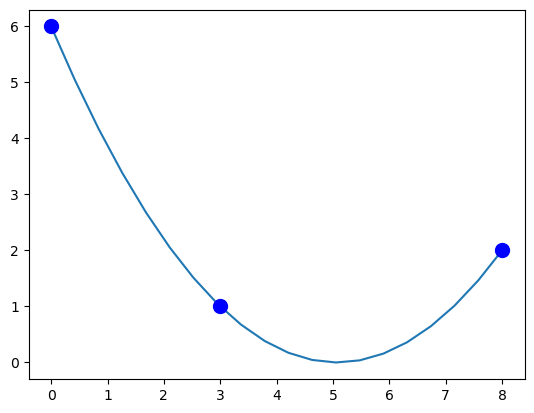

In [81]:
xs = np.linspace(0, 8, 20)
ys = a[0] + a[1] * xs + a[2]*xs**2
plt.plot(xs, ys, x, y, 'b.', ms=20)
plt.show()

##### Over Fitting 10 Random Points
Now let's interpolate points with $x_{i} = i, i= 0, \dots, 9$ and 10 random integers sampled from $[0, 10)$ as $y$ values:

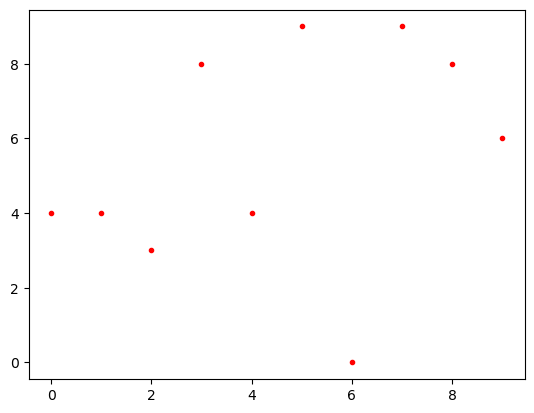

In [82]:
N = 10
x = np.arange(0, N)
y = np.random.randint(0, 10, N)
plt.plot(x, y, 'r.')
plt.show()

Create the Vandermonde matrix and verify the first 5 rows and columns:

In [83]:
X = np.column_stack([x**k for k in range(0, N)])
print(X[:5, :5])

[[  1   0   0   0   0]
 [  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


In [84]:
print(X)

[[        1         0         0         0         0         0         0
          0         0         0]
 [        1         1         1         1         1         1         1
          1         1         1]
 [        1         2         4         8        16        32        64
        128       256       512]
 [        1         3         9        27        81       243       729
       2187      6561     19683]
 [        1         4        16        64       256      1024      4096
      16384     65536    262144]
 [        1         5        25       125       625      3125     15625
      78125    390625   1953125]
 [        1         6        36       216      1296      7776     46656
     279936   1679616  10077696]
 [        1         7        49       343      2401     16807    117649
     823543   5764801  40353607]
 [        1         8        64       512      4096     32768    262144
    2097152  16777216 134217728]
 [        1         9        81       729      6561    

Solve the linear system:

In [85]:
a = la.solve(X, y)
print(a)

[ 4.00000000e+00  3.33436508e+02 -8.59278968e+02  8.63906327e+02
 -4.53651389e+02  1.38388657e+02 -2.54055556e+01  2.76441799e+00
 -1.64087302e-01  4.08950617e-03]


Plot the interpolation:

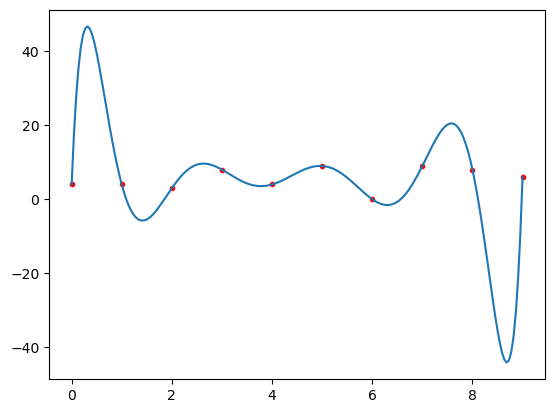

In [86]:
xs = np.linspace(0, N-1, 200)
ys = sum([a[k]*xs**k for k in range(0,N)])
plt.plot(x, y, 'r.', xs, ys)
plt.show()

Success! But notice how unstable the curve is. That's why it better to use a cubic spline to interpolate a large number of points.

However real-life data is usually very noisy and interpolation is not the best tool to fit a line to data. Instead we would want to take a polynomial with smaller degree (like a line) and fit it as best we can without interpolation the points.

### Least Sqaures Linear Regression
Suppose we have $n+1$ points $$(x_{0}, y_{0}), (x_{1},y_{1}), \dots, (x_{n},y_{n})$$ in the $xy$-plane and we want to fit a line 
$$y=a_{0} +a_{1}x$$
that "best fits" the data. There are different ways to quantify what "best fit" means but the most common method is called least squares linear regression. In least squares linear regression, we want to minimize the sum of squared errors
$$SSE = \sum_{i}(y_{i}-(a_{0}+a_{i}x_{i}))^{2}$$

#### Formulation
If we form matrices 
$$ X = 
\begin{bmatrix} 
1 & x_{0}\\
1 & x_{1}\\
\vdots & \vdots\\
1 & x_{n}
\end{bmatrix},
\mathbf{y} = \begin{bmatrix}
y_{0}\\
y_{1}\\
\vdots\\
y_{n}
\end{bmatrix}

\mathbb{a} = \begin{bmatrix} a_{0} \\a_{1} \end{bmatrix}$$
then the sum of squared errors can be expressed as $$SSE = \left|\mathbf{y}-X\mathbf{a}\right|^{2}$$

**Theorem.** (Least Squares Regression) Consider $n+1$ points
$$\left(x_{0}, y_{0}\right), \left(x_{1},y_{1}\right), \dots, \left(x_{n}, y_{n}\right)$$
in the $xy$-plane. The coefficients $\mathbf{a}=\left[a_{0}, a_{1} \right]^{T}$ which minimize the sum of squared errors
$$SSE = \sum_{i} (y_{i}-(a_{0}+a_{i}x_{i}))^{2}$$
is the unique solution of the system
$$(X^{T}X)\mathbf{a} = X^{T}\mathbf{y}$$

*Sketch of Proof.* The product $X\mathbf{a}$ is in the column space of $X$. The line connecting $y$ to the nearest point in the column space of $X$ is perpendicular to the column space to $X$. Therefore 
$$X^{T}(\mathbf{y}-X\mathbf{a}) = \mathbf{0}$$ 
and so
$$(X^{T}X)\mathbf{a} = X^{T}\mathbf{y}$$

#### Examples
**Fake Noisy Linear Data**
Let's do an example with some fake data. Let's build a set of random points based on the model $$y= a_{0} + a_{1} + \epsilon$$
for some arbitrary choice of $a_{0}$, and $a_{1}$. The factor $\epsilon$ respresents some random noise which we model using the normal distribution. We can generate random numbers sampled from the standard normal distribution using the NumPy function `numpy.random.rand`.

This goal is to demonstrate that we can use linear regression to retrieve the coefficients $a_{0}$ and $a_{1}$ from the linear regression calculation.

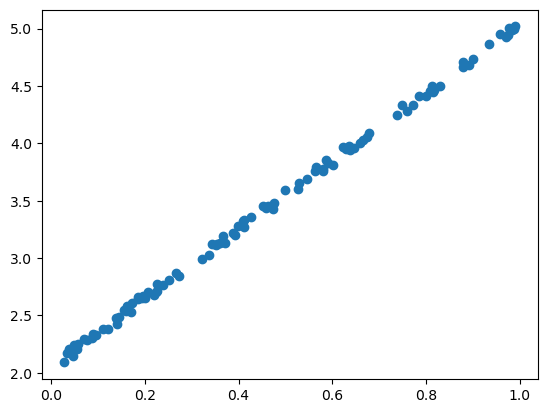

In [87]:
a0 = 2
a1 = 3
N = 100
x = np.random.rand(100)
noise = 0.1*np.random.rand(100)
y = a0 + a1*x + noise
plt.scatter(x,y);
plt.show()

Let's use linear regression to retrieve the coefficients $a_{0}$ and $a_{1}$. Construct the matrix $X$:

In [88]:
X = np.column_stack([np.ones(N),x])
print(X.shape)
#print(X)

(100, 2)


Let's look at the first 5 rows of $X$ to see that it is in the correct form:

In [89]:
X[:5, :]

array([[1.        , 0.66013266],
       [1.        , 0.95775897],
       [1.        , 0.20067272],
       [1.        , 0.97784147],
       [1.        , 0.988653  ]])

Use `scipy.linalg.solve` to solve $\left(X^{T}X\right)\mathbf{a} = \left(X^{T}\right)\mathbf{y}$ for $\mathbf{a}$:

In [90]:
a = la.solve(X.T @ X, X.T @ y)
print(a)

[2.06368446 2.9728369 ]


We have retrieved the coefficients of the model almost exactly! Let's plot the random data points with the linear regression we just computed.

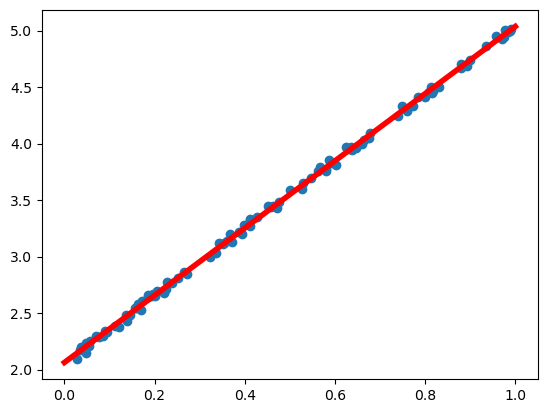

In [91]:
xs = np.linspace(0, 1, 10)
ys = a[0] + a[1]*xs
plt.plot(xs, ys, 'r', linewidth=4)
plt.scatter(x,y);
plt.show()

### Polynomial Regression
#### Formulation
The same idea works for fiting a degree of polynomial model
$$y = a_{0} +a_{1}x+a_{2}x^{2} + \dots + a_{d}x^{d}$$
to a set of $n+1$ data points
$$\left(x_{0}, y_{0}\right), \left(x_{1}, y_{1}\right), \dots, \left(x_{y},y_{n}\right)$$
We form the matrices as before but now the Vandermonde matrix $X$ has $d+1$ columns
$$X = 
\begin{bmatrix}
1 & x_{0} & x_{0}^{2} & \dots &x_{0}^{n}\\
1 & x_{1} & x_{1}^{2} & \dots &x_{1}^{n}\\
  & \vdots &           &       &\vdots \\
1 & x_{n} & x_{n}^{2} & \dots &x_{n}^{n}
\end{bmatrix}
\quad \text{and} \quad y = \begin{bmatrix}
y_{0} \\
y_{1} \\
\vdots \\
y_{n} \end{bmatrix}
, \quad \mathbf{a} = 
\begin{bmatrix}
a_{0} \\ a_{1} \\ \vdots \\ a_{n} 
\end{bmatrix}$$
The coefficients $\mathbf{a} = \left[a_{0}, a_{1}, a_{2}, \cdots, a_{d}\right]^{T}$ which minimize the sum of squared erros $SSE$ is the unique solution of the linear system
$$\left(X^{T}X\right)\mathbf{a} = \left(X^{T}\right)\mathbf{y}$$

#### Example
##### Fake Noisy Quadratic Data
Let's build some fake data using a quadratic model $y=a_{0}+a_{1}x+a_{2}x^{2}+\epsilon$ and use linear regression to retrieve the coefficients $a_{0}$, $a_{1}$, and $a_{2}$.

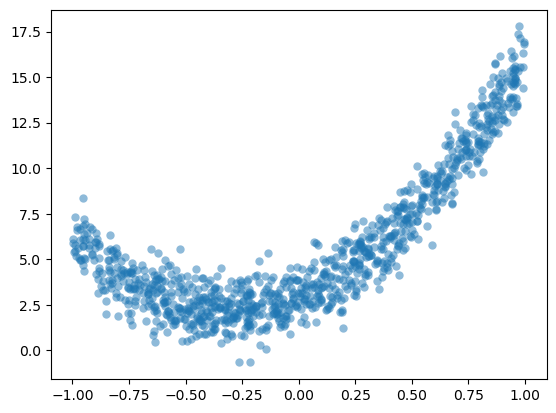

In [92]:
a0 = 3
a1 = 5
a2 = 8
N = 1000
x = 2*np.random.rand(N) - 1 # Random numbers in the interval (-1, 1)
noise = np.random.randn(N)
y = a0 + a1*x + a2*x**2 + noise
plt.scatter(x, y, alpha=0.5, lw=0);
plt.show()

Construct the matrix $X$:

In [93]:
X = np.column_stack([np.ones(N), x, x**2])

Use `scipy.linalg.solve` to solve $\left(X^{T}X\right)\mathbf{a} = \left(X^{T}\right)\mathbf{y}$:

In [94]:
X[0:10, ]

array([[ 1.        ,  0.40993891,  0.16804991],
       [ 1.        , -0.17319513,  0.02999655],
       [ 1.        ,  0.39738825,  0.15791742],
       [ 1.        , -0.78519633,  0.61653327],
       [ 1.        , -0.09022852,  0.00814119],
       [ 1.        , -0.32457565,  0.10534935],
       [ 1.        ,  0.61235965,  0.37498434],
       [ 1.        , -0.92537641,  0.85632149],
       [ 1.        ,  0.18615391,  0.03465328],
       [ 1.        , -0.62643875,  0.39242551]])

In [95]:
a = la.solve((X.T @ X), X.T @ y)
print(a)

[2.9750605  4.95060562 8.0744273 ]


Plot the result:

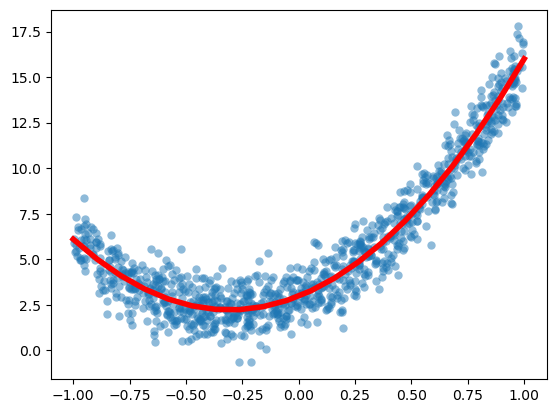

In [96]:
xs = np.linspace(-1, 1, 20)
ys = a[0] + a[1]*xs + a[2]*xs**2
plt.plot(xs, ys, 'r', linewidth=4)
plt.scatter(x, y, alpha=0.5, lw=0)
plt.show()